### 4 - Displaying Core Data and Deriving a Poro Perm Relationship

Created By: Andy McDonald
<br><br>
The following short tutorial illustrates the process of loading in core data from a CSV file, creating poro-perm crossplots, and deriving a poro-perm relationship using numpy.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
core_data = pd.read_csv("Data/15_9-19A-CORE.csv", na_values=' ')

In [23]:
core_data.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [24]:
core_data.describe()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
count,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000
mean,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901
std,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560
min,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000
25%,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000
50%,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000
75%,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000
max,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000


We can make a quick scatter plot by:

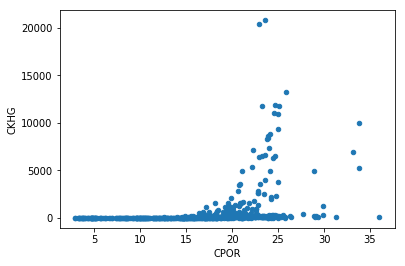

In [26]:
core_data.plot(kind="scatter", x="CPOR", y="CKHG")

There is one main problem with previous plot. Poro-perm data is normally presented on semilog scale, where the y-axis is logarithmic and the x-axis set to linear. We can change this by using the yscale('log') method.

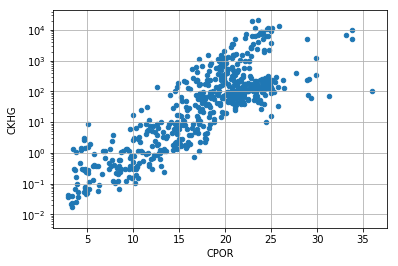

In [27]:
core_data.plot(kind="scatter", x="CPOR", y="CKHG")
plt.yscale('log')
plt.grid(True)

We can further refine the scatter plot by removing the scientific notation on the y-axis.

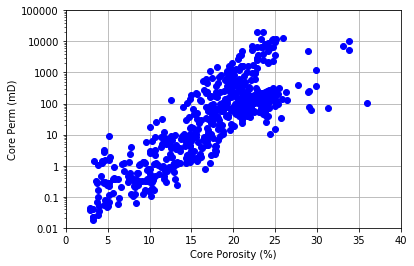

In [31]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 40, 0.01, 100000])
ax.plot(core_data['CPOR'], core_data['CKHG'], 'bo')
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

We can derive a linear regression by using the polyfit function from numpy. As we are working with a semi-log plot, we need to calculate log base 10 of the core permeability.

In [45]:
import statsmodels.api as sm

x = core_data['CPOR']
y = np.log10(core_data['CKHG'])

model = sm.OLS(y, x, missing='drop')
results = model.fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   CKHG   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              2129.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                   2.80e-192
Time:                        23:18:49   Log-Likelihood:                         -726.48
No. Observations:                 557   AIC:                                      1455.
Df Residuals:                     556   BIC:                                      1459.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CPOR           0.0949      0.002     46.145      0.000       0.091       0.099
==============================================================================
Omnibus:                        9.398   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.595
Skew:                           0.198   Prob(JB):                       0.0224
Kurtosis:                       2.588   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x = np.polyfit(core_data['CPOR'], np.log10(core_data['CKHG']), 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [33]:
x

array([nan, nan])

The result of the regression is: $10^{(0.16911398  * CPOR - 1.61346487)}$

Using the code from the previous plot, we can now add a new line with our x-axis set to porosity and our y-axis set to an equation. Note that we have to use the equation above to reverse the log base 10 function used when deriving the function.

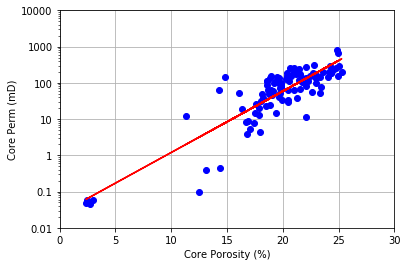

In [10]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 30, 0.01, 10000])
ax.semilogy(core_data['CPOR'], core_data['CKH'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['CPOR'], 10**(x[0] * core_data['CPOR'] + x[1]), 'r-')


#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    


Our next step is to calculate a predicted permeability using our new equation and add it as a new column in the pandas dataframe.

In [11]:
core_data["PRED_PERM"] = 10**(x[0] * core_data['CPOR'] + x[1])

In [12]:
core_data.describe()

,DEPTH,SW,SO,CKH,CPOR,CGD,PRED_PERM
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,10761.782905,35.509717,40.728041,114.365102,19.677500,2.661935,106.406799
std,28.333169,12.124610,11.880550,116.074693,4.366594,0.015253,108.960627
min,10715.701150,21.489047,0.000000,0.045000,2.360000,2.647000,0.061044
25%,10738.079762,26.733086,36.095689,36.319000,18.607500,2.655000,34.145923
50%,10760.648600,31.393546,42.411968,96.861500,20.330000,2.657000,66.788949
75%,10783.054388,41.666675,47.502606,151.569250,22.137500,2.663000,135.011588
max,10811.411500,77.868532,99.226071,788.070000,25.280000,2.758000,458.919473


We can then make a quick plot of our prediction vs the original measurement. To get an idea of how well the prediction did, we can add a 1 to 1 line to aid the visualisation.

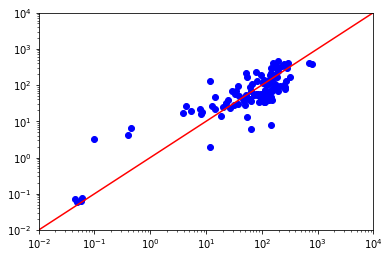

In [13]:
fig, ax = plt.subplots()

ax.axis([0.01, 10000, 0.01, 10000])
ax.loglog(core_data['CKH'], core_data['PRED_PERM'], 'bo')
ax.loglog([0.01, 10000], [0.01, 10000], 'r-')